Описание задачи:
 Целью проекта является разработка модель предсказания стоимости автомобиля на вторичном рынке.

Описание полей данных

1. Date: Год выпуска автомобиля.
2. Make: Марка автомобиля.
3. Model: издание автомобиля определенной марки.
4. Trim: Уровни отделки салона автомобиля — это просто разные версии модели.
5. Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
6. Transmission: механизм, который передает мощность от двигателя к колесам.
7. VIN: идентификационный номер транспортного средства.
8. State: состояние, в котором автомобиль выставлен на аукцион.
9. Condition: Состояние автомобилей на момент аукциона.
10. Odometer: расстояние, пройденное автомобилем с момента выпуска.
11. Color: Цвет кузова автомобиля.
12. Interior: Цвет салона автомобиля.
13. Seller: Продавец автомобиля, автосалоны.
14. mmr: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
15. sellingprice: цена, по которой автомобиль был продан на аукционе.
16. saledate: Дата продажи автомобиля.




План работы
1. Загрузка данных и библиотек для работы
2. Обработка датасетов
3. Изучение данных
4. Подготовка датасетов к ML
5. Исследование моделей обучения
6. Заключение


# 1. Загрузка данных и библиотек для работы

In [ ]:
# загрузим бибилотеку
!pip install vininfo

In [ ]:
# Библиотеки используемые в работе
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from pathlib import Path
from tqdm import tqdm
from vininfo import Vin

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    GridSearchCV,
)

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)

from sklearn.linear_model import (
    Ridge,
    ElasticNet
)

from catboost import CatBoostRegressor


In [ ]:
# загрузка датасетов
try:
    train_db = pd.read_csv('train.csv')
    test_db = pd.read_csv('test.csv')
except:
    train_db = pd.read_csv('\train.csv')
    test_db = pd.read_csv('\test.csv')


**Вывод:** Были импортированны базовые библиотеки и скачены основные датасеты для работы. Тренировочный и тестовый датасет отображаются без проблем.

# 2. Обработка датасетов





In [ ]:
def base_analizez(data):
    ''' функция для изучения датасета'''

    print('Просмотр датасета:')
    display(data.head())

    print('\n')
    print('Общая информация об датасете:')
    print(data.info())

    print('\n')
    print('Проверка на наличие значений nan в датасете:')
    display(pd.DataFrame(round(
        data.isna().mean()*100,)).style.background_gradient('coolwarm'))


In [ ]:
# подробное изучения тренировойчного датасета
base_analizez(train_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB
None


Проверка на наличие значений nan в дат

,0
year,0.000000
make,2.000000
model,2.000000
trim,2.000000
body,2.000000
transmission,12.000000
vin,0.000000
state,0.000000
condition,2.000000
odometer,0.000000


In [ ]:
# сразу удалим пустые значения т.к. их содержание меньше 2%
train_db = train_db.dropna(subset = ['make', 'model', 'body','trim', 'condition','color', 'odometer'])

In [ ]:
# изучение тестового датасета
base_analizez(test_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None


Проверка на наличие значений nan в датасете:


,0
year,0.000000
make,2.000000
model,2.000000
trim,2.000000
body,2.000000
transmission,12.000000
vin,0.000000
state,0.000000
condition,2.000000
odometer,0.000000


Далее напишим ряд функция для заполнения пустых данных в тестовом датасете

In [ ]:
def model(data):
    """заполнение пропусков в model через vininfo"""
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'model']):
            try:
                data['model'][i] = Vin(data['vin'][i]).wmi
            except:
                data['model'][i] = 'not info'

In [ ]:
def make(data):
    """заполнение пропусков в make через vininfo"""
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'make']):
            try:
                data['make'][i] = Vin(data['vin'][i]).manufacturer
            except:
                data['make'][i] = 'not info'

In [ ]:
# В дальнейшем все значения будут подбираться через модель автомобиля.
# Поэтому необхоидмо сократить число неявных дубликатов именно сейчас
test_db['model'] = test_db['model'].astype('str').str.lower()
test_db['model'] = test_db['model'].astype('str').str.rstrip()

In [ ]:
def change_trim(data):
    '''меняет пустые значения trim на самые распрастраненные'''
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'trim']):
            try:
                trim = data[data['model'] == data['model'][i]].groupby('trim')['model'] \
                .count().sort_values(ascending = False)
                data['trim'][i] = trim.index[0]
            except:
                data['trim'][i] = 'not info'


In [ ]:
def change_body(data):
    '''меняет пустые значения body на самые распрастраненные'''
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'body']):
            try:
                body = data[data['model'] == data['model'][i]].groupby('body')['model'] \
                .count().sort_values(ascending = False)
                data['body'][i] = trim.index[0]
            except:
                data['body'][i] = 'not info'


In [ ]:
def change_color(data):
    '''меняет пустые значения color на самые распрастраненные'''
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'color']):
            try:
                body = data[data['model'] == data['model'][i]].groupby('color')['model'] \
                .count().sort_values(ascending = False)
                data['color'][i] = trim.index[0]
            except:
                data['color'][i] = 'not info'

In [ ]:
def change_interior(data):
    '''меняет пустые значения interio на самые распрастраненные'''
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'interior']):
            try:
                body = data[data['model'] == data['model'][i]].groupby('interior')['model'] \
                .count().sort_values(ascending = False)
                data['interior'][i] = trim.index[0]
            except:
                data['interior'][i] = 'not info'

In [ ]:
def change_odometer(data):
    '''меняет пустые значения odometer на самые распрастраненные'''

    for i in tqdm(data['model'].unique()):
        data.loc[(data['model'] == i) & (data['odometer'].isna()), 'odometer'] = \
        data.loc[(data['model'] == i), 'odometer'].median()
    return data

In [ ]:
def change_condition(data):
    '''меняет пустые значения condition на самые распрастраненные'''

    for i in tqdm(data['model'].unique()):
        data.loc[(data['model'] == i) & (data['condition'].isna()), 'condition'] = \
        data.loc[(data['model'] == i), 'condition'].median()
    return data

In [ ]:
def change_transmission(data):
    '''меняет пустые значения transmission на самые распрастраненные'''

    new_transmission = {}

    for i in tqdm(data['model'].unique()):
        counted = []
        try:
            for x in data['transmission'].unique():
                if x == 'Nan':
                    pass
                counted.append([x, data.loc[(data['model'] == i) & (data['transmission'] == x), ['transmission']].count()])
        except:
            counted.append('Nan')
        try:
            if counted[0][1] >= counted[1][0]:
                new_transmission[i] = counted[0][0]
            else:
                new_transmission[i] = counted[1][0]
        except:
            new_transmission[i] = counted[0][0]

    for x in tqdm(data['model'].unique()):
        data.loc[(data['model'] == x) & (data['transmission'].isna()), 'transmission'] = new_transmission[x]

    return data

In [ ]:
model(test_db)

100%|██████████| 110058/110058 [00:01<00:00, 106210.15it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['model'] == 'not info'].shape

(0, 14)

In [ ]:
make(test_db)

100%|██████████| 110058/110058 [00:02<00:00, 51642.36it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['model'] == 'not info'].shape

(0, 14)

In [ ]:
change_trim(test_db)

100%|██████████| 110058/110058 [00:18<00:00, 5962.11it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['trim'] == 'not info'].shape

(21, 14)

In [ ]:
change_body(test_db)

100%|██████████| 110058/110058 [00:21<00:00, 5025.48it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['body'] == 'not info'].shape

(2594, 14)

In [ ]:
change_color(test_db)

100%|██████████| 110058/110058 [00:02<00:00, 49351.19it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['color'] == 'not info'].shape

(158, 14)

In [ ]:
change_interior(test_db)

100%|██████████| 110058/110058 [00:02<00:00, 48441.97it/s]


In [ ]:
# проверка на наличие ячеек без информации
test_db[test_db['interior'] == 'not info'].shape

(158, 14)

In [ ]:
test_db = change_odometer(test_db)
test_db = change_condition(test_db)

100%|██████████| 747/747 [00:08<00:00, 83.37it/s]


In [ ]:
# в основном машины без данных о пробеге старые. Проставим всем 1
test_db.loc[test_db['condition'].isna()] = 1

In [ ]:
%%time
train_db = change_transmission(train_db)
test_db = change_transmission(test_db)

100%|██████████| 743/743 [00:07<00:00, 103.62it/s]

CPU times: total: 2min 32s
Wall time: 2min 33s


In [ ]:
base_analizez(train_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 420328 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          420328 non-null  int64  
 1   make          420328 non-null  object 
 2   model         420328 non-null  object 
 3   trim          420328 non-null  object 
 4   body          420328 non-null  object 
 5   transmission  420328 non-null  object 
 6   vin           420328 non-null  object 
 7   state         420328 non-null  object 
 8   condition     420328 non-null  float64
 9   odometer      420328 non-null  float64
 10  color         420328 non-null  object 
 11  interior      420328 non-null  object 
 12  seller        420328 non-null  object 
 13  sellingprice  420328 non-null  int64  
 14  saledate      420328 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 51.3+ MB
None


Проверка на наличие значений nan в дат

,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


In [ ]:
base_analizez(test_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,cts,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,savana cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     110058 non-null  float64
 9   odometer      110058 non-null  float64
 10  color         110058 non-null  object 
 11  interior      110058 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None


Проверка на наличие значений nan в датасете:


,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


In [ ]:
# выделим колонки с типомаи данных int и object для удобства
def int_or_object(data):
    columns_int = []
    columns_object = []
    for i in data.columns:
        if (data[i].dtype == np.float64 or data[i].dtype == np.int64):
            columns_int.append(i)
        else:
            columns_object.append(i)
    return columns_int, columns_object

In [ ]:
# применим данную функцию к датасетам и удалим из колонок информацию о
# дате продажи авто
columns_int_tr, columns_object_tr = int_or_object(train_db)
columns_int_test, columns_object_test = int_or_object(test_db)

columns_object_tr.remove('saledate')
columns_object_test.remove('saledate')

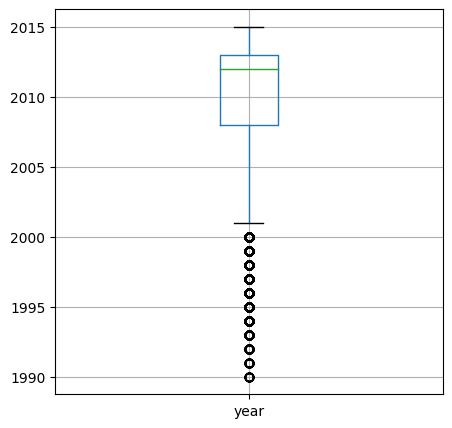

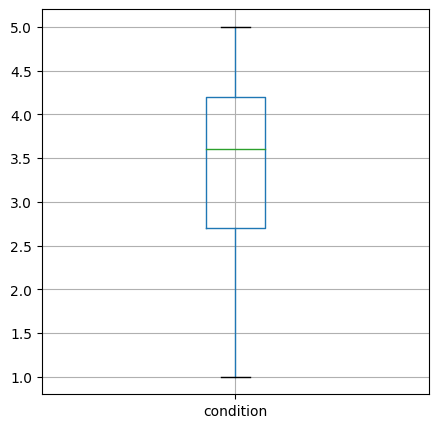

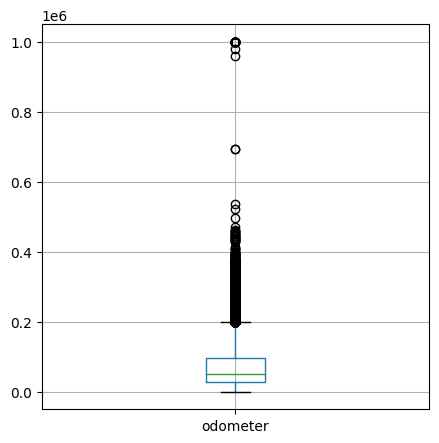

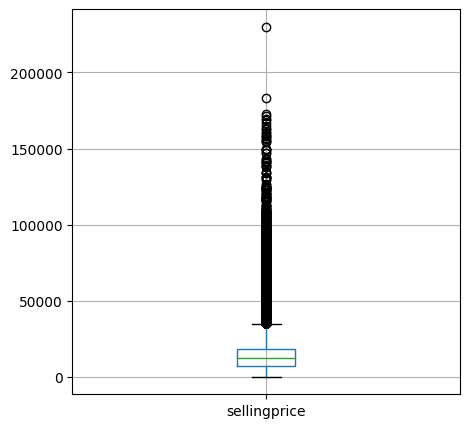

In [ ]:
# просмотр распределения значений в тренировочном датасете
for i in columns_int_tr:
    train_db.boxplot(i,figsize=(5, 5))
    plt.show()

In [ ]:
# вырежем вбрсоовые данные
train_db = train_db.loc[(train_db['year'] >= 2001) & (train_db['sellingprice'] <= 32500) & (train_db['odometer'] <= 180000)]

In [ ]:
# просмотр результа изменения датасета
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383188 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          383188 non-null  int64  
 1   make          383188 non-null  object 
 2   model         383188 non-null  object 
 3   trim          383188 non-null  object 
 4   body          383188 non-null  object 
 5   transmission  383188 non-null  object 
 6   vin           383188 non-null  object 
 7   state         383188 non-null  object 
 8   condition     383188 non-null  float64
 9   odometer      383188 non-null  float64
 10  color         383188 non-null  object 
 11  interior      383188 non-null  object 
 12  seller        383188 non-null  object 
 13  sellingprice  383188 non-null  int64  
 14  saledate      383188 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 46.8+ MB


In [ ]:
# привидём все категориальные данные в датасетах к единому регистру

for i in columns_object_tr:
    train_db[i] = train_db[i].astype('str').str.lower()

for i in columns_object_tr:
    train_db[i] = train_db[i].astype('str').str.rstrip()

for i in columns_object_test:
    test_db[i] = test_db[i].astype('str').str.lower()

for i in columns_object_test:
    test_db[i] = test_db[i].astype('str').str.rstrip()

In [ ]:
# поиск неявных дубликатов в датасете train
for x in columns_object_tr:
    print('Уникальные значения для столбца', x, train_db[x].sort_values().unique(), '\n')

Уникальные значения для столбца make ['acura' 'audi' 'bentley' 'bmw' 'buick' 'cadillac' 'chevrolet' 'chrysler'
 'daewoo' 'dodge' 'fiat' 'ford' 'gmc' 'honda' 'hummer' 'hyundai'
 'infiniti' 'isuzu' 'jaguar' 'jeep' 'kia' 'land rover' 'lexus' 'lincoln'
 'maserati' 'mazda' 'mercedes-benz' 'mercury' 'mini' 'mitsubishi' 'nissan'
 'oldsmobile' 'plymouth' 'pontiac' 'porsche' 'ram' 'saab' 'saturn' 'scion'
 'smart' 'subaru' 'suzuki' 'toyota' 'volkswagen' 'volvo'] 

Уникальные значения для столбца model ['1 series' '1500' '2 series' '200' '2500' '3' '3 series'
 '3 series gran turismo' '300' '300m' '3500' '350z' '370z' '4 series'
 '4runner' '5 series' '5 series gran turismo' '500' '500e' '500l' '6'
 '6 series' '6 series gran coupe' '626' '7 series' '9-2x' '9-3' '9-5'
 '9-7x' '911' 'a3' 'a4' 'a5' 'a6' 'a8' 'acadia' 'accent' 'accord'
 'accord crosstour' 'accord hybrid' 'activehybrid 5' 'activehybrid 7'
 'activehybrid x6' 'aerio' 'alero' 'allroad' 'allroad quattro' 'altima'
 'altima hybrid' 'amanti' '

Уникальные значения для столбца state ['ab' 'al' 'az' 'ca' 'co' 'fl' 'ga' 'hi' 'il' 'in' 'la' 'ma' 'md' 'mi'
 'mn' 'mo' 'ms' 'nc' 'ne' 'nj' 'nm' 'ns' 'nv' 'ny' 'oh' 'ok' 'on' 'or'
 'pa' 'pr' 'qc' 'sc' 'tn' 'tx' 'ut' 'va' 'wa' 'wi'] 

Уникальные значения для столбца color ['beige' 'black' 'blue' 'brown' 'burgundy' 'charcoal' 'gold' 'gray'
 'green' 'lime' 'off-white' 'orange' 'pink' 'purple' 'red' 'silver'
 'turquoise' 'white' 'yellow' '—'] 

Уникальные значения для столбца interior ['beige' 'black' 'blue' 'brown' 'burgundy' 'gold' 'gray' 'green'
 'off-white' 'orange' 'purple' 'red' 'silver' 'tan' 'white' 'yellow' '—'] 

Уникальные значения для столбца seller ['1 cochran of monroeville' '1360250 alberta ltd.' '143 auto sales inc'
 ... 'zmax moto leasing inc' 'zoom auto' 'zygi auto corp'] 



In [ ]:
# изменения неявных дубликатов
train_db['color'] = train_db['color'].str.replace('—', 'Nan')
train_db['interior'] = train_db['interior'].str.replace('—', 'Nan')
train_db['trim'] = train_db['trim'].str.replace('!', 'Nan')
train_db['trim'] = train_db['trim'].str.replace('+', 'Nan')

train_db['model'] = train_db['model'].str.replace('1','1 Series')
train_db['model'] = train_db['model'].str.replace('3','3 Series')
train_db['model'] = train_db['model'].str.replace('300','300-Class')
train_db['model'] = train_db['model'].str.replace('6','6 Series')

train_db['body'] = train_db['body'].str.replace('regular-cab','regular cab')

train_db['make'] = train_db['make'].str.replace('gmc truck','gmc')
train_db['make'] = train_db['make'].str.replace('mazda tk','mazda')
train_db['make'] = train_db['make'].str.replace('mercedes-b', 'mercedes-benz')
train_db['make'] = train_db['make'].str.replace('mercedes', 'mercedes-benz')
train_db['make'] = train_db['make'].str.replace('landrover','land rover')
train_db['make'] = train_db['make'].str.replace('vw', 'volkswagen')
train_db['make'] = train_db['make'].str.replace('Mercedes-Benzenz', 'mercedes-benz')
train_db['make'] = train_db['make'].str.replace('chev truck', 'chevrolet')
train_db['make'] = train_db['make'].str.replace('ford tk', 'ford')
train_db['make'] = train_db['make'].str.replace('hyundai tk', 'hyundai' )
train_db['make'] = train_db['make'].str.replace('mercedes-benz-benzenz-benzenz', 'mercedes-benz' )
train_db['make'] = train_db['make'].str.replace('mercedes-benz-benzenz', 'mercedes-benz' )
train_db['make'] = train_db['make'].str.replace('mercedes-benz-benz', 'mercedes-benz' )

In [ ]:
# поиск неявных дубликатов в датасете test
for x in columns_object_test:
    print('Уникальные значения для столбца', x, test_db[x].sort_values().unique(), '\n')

Уникальные значения для столбца make ['1' 'acura' 'aston martin' 'audi' 'bentley' 'bmw' 'buick' 'cadillac'
 'cami' 'chev truck' 'chevrolet' 'chevrolet canada' 'chevrolet mexico'
 'chevrolet usa' 'chrysler' 'chrysler canada' 'daewoo'
 'daimlerchrysler ag/daimler ag' 'dodge' 'dodge canada' 'dodge mexico'
 'ferrari' 'fiat' 'fisker' 'ford' 'ford tk' 'genesis' 'geo' 'gmc'
 'gmc truck' 'honda' 'hummer' 'hyundai' 'infiniti' 'isuzu' 'jaguar' 'jeep'
 'kia' 'land rover' 'landrover' 'lexus' 'lexus canada' 'lincoln' 'lotus'
 'maserati' 'mazda' 'mercedes' 'mercedes-benz' 'mercedes-benz (sprinter)'
 'mercury' 'mini' 'mitsubishi' 'nissan' 'oldsmobile' 'plymouth' 'pontiac'
 'porsche' 'porsche car' 'ram' 'rolls-royce' 'saab' 'saturn' 'scion'
 'smart' 'subaru' 'suzuki' 'tesla' 'toyota' 'volkswagen' 'volvo' 'vw'] 

Уникальные значения для столбца model ['1' '1 series' '1500' '2 series' '200' '200sx' '2500' '3' '3 series'
 '3 series gran turismo' '300' '300-class' '3000gt' '300e' '300m' '300zx'
 '350' '35

Уникальные значения для столбца body ['1' 'access cab' 'beetle convertible' 'cab plus' 'club cab' 'convertible'
 'coupe' 'crew cab' 'crewmax cab' 'cts coupe' 'cts wagon' 'cts-v coupe'
 'double cab' 'e-series van' 'elantra coupe' 'extended cab'
 'g convertible' 'g coupe' 'g sedan' 'g37 convertible' 'g37 coupe'
 'genesis coupe' 'granturismo convertible' 'hatchback' 'king cab' 'koup'
 'mega cab' 'minivan' 'not info' 'promaster cargo van' 'q60 convertible'
 'q60 coupe' 'quad cab' 'regular cab' 'regular-cab' 'sedan' 'supercab'
 'supercrew' 'suv' 'transit van' 'tsx sport wagon' 'van' 'wagon' 'xtracab'] 

Уникальные значения для столбца transmission ['1' 'automatic' 'manual'] 

Уникальные значения для столбца vin ['1' '19uua5642xa049650' '19uua5643xa001218' ... 'zfbcfadh9ez025311'
 'zffew59a170151809' 'zffyt53a840138209'] 

Уникальные значения для столбца state ['1' 'ab' 'al' 'az' 'ca' 'co' 'fl' 'ga' 'hi' 'il' 'in' 'la' 'ma' 'md' 'mi'
 'mn' 'mo' 'ms' 'nc' 'ne' 'nj' 'nm' 'ns' 'nv' 'ny' 'oh' 'o

In [ ]:
# изменения неявных дубликатов
test_db['color'] = test_db['color'].str.replace('—', 'Nan')
test_db['interior'] = test_db['interior'].str.replace('—', 'Nan')
test_db['trim'] = test_db['trim'].str.replace('!', 'Nan')
test_db['trim'] = test_db['trim'].str.replace('+', 'Nan')

test_db['model'] = test_db['model'].str.replace('1','1 Series')
test_db['model'] = test_db['model'].str.replace('3','3 Series')
test_db['model'] = test_db['model'].str.replace('300','300-Class')
test_db['model'] = test_db['model'].str.replace('6','6 Series')

train_db['body'] = train_db['body'].str.replace('regular-cab','regular cab')

test_db['make'] = test_db['make'].str.replace('1','one')
test_db['make'] = test_db['make'].str.replace('chevrolet canada','chevrolet')
test_db['make'] = test_db['make'].str.replace('chevrolet mexico', 'chevrolet')
test_db['make'] = test_db['make'].str.replace('chevrolet usa', 'chevrolet')
test_db['make'] = test_db['make'].str.replace( 'chrysler canada', 'chrysler')
test_db['make'] = test_db['make'].str.replace('daimlerchrysler ag/daimler ag', 'mercedes-benz')
test_db['make'] = test_db['make'].str.replace('mercedes-benz (sprinter)', 'mercedes-benz')
test_db['make'] = test_db['make'].str.replace('porsche car','porsche')
test_db['make'] = test_db['make'].str.replace('dodge canada', 'dodge')
test_db['make'] = test_db['make'].str.replace('dodge mexico', 'dodge')
test_db['make'] = test_db['make'].str.replace('lexus canada', 'lexus')
test_db['make'] = test_db['make'].str.replace('gmc truck','gmc')
test_db['make'] = test_db['make'].str.replace('mazda tk','mazda')
test_db['make'] = test_db['make'].str.replace('mercedes-b', 'mercedes-benz')
test_db['make'] = test_db['make'].str.replace('mercedes', 'mercedes-benz')
test_db['make'] = test_db['make'].str.replace('landrover','land rover')
test_db['make'] = test_db['make'].str.replace('vw', 'volkswagen')
test_db['make'] = test_db['make'].str.replace('Mercedes-Benzenz', 'mercedes-benz')
test_db['make'] = test_db['make'].str.replace('chev truck', 'chevrolet')
test_db['make'] = test_db['make'].str.replace('ford tk', 'ford')
test_db['make'] = test_db['make'].str.replace('hyundai tk', 'hyundai' )
test_db['make'] = test_db['make'].str.replace('mercedes-benz-benzenz-benzenz', 'mercedes-benz' )
test_db['make'] = test_db['make'].str.replace('mercedes-benz-benzenz', 'mercedes-benz' )
test_db['make'] = test_db['make'].str.replace('mercedes-benz-benz', 'mercedes-benz' )

In [ ]:
def cut_model(data):
    '''функция сокращает названия моделей всех автомобилей'''
    for i in data['model'].unique():
        x = i.split(' ')
        if len(x) > 1:
            pass
        if len(x) > 2:
            row = str(x[0] + ' ' + x[-1])
            data.loc[data['model'] == i, 'model'] = row

In [ ]:
cut_model(train_db)

In [ ]:
cut_model(test_db)

In [ ]:
#наличия дубликатов в датасете
train_db.duplicated().sum()

0

In [ ]:
def overwriting_saledate(data):
    '''функция переформатирования даты продажи авто'''
    data['date'] = pd.to_datetime(data['saledate'], infer_datetime_format=True, utc=True)
    data['date'] = data['date'].dt.date

In [ ]:
train_db['saledate'] = overwriting_saledate(train_db)
test_db['saledate'] = overwriting_saledate(test_db)

In [ ]:
# удаление старой колонки с датой и переименование новой
train_db = train_db.drop(columns=['saledate'], axis=1)
train_db = train_db.rename(columns={"date": "saledate"})

test_db = test_db.drop(columns=['saledate'], axis=1)
test_db = test_db.rename(columns={"date": "saledate"})

In [ ]:
# установка формата времени
train_db['saledate'] = pd.to_datetime(train_db['saledate'], format = '%Y-%m-%d')
test_db['saledate'] = pd.to_datetime(test_db['saledate'], format = '%Y-%m-%d')

In [ ]:
train_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02


In [ ]:
test_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-13
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015-02-26
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-23
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-05
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015-06-02


**Вывод:** В тренировочном датасете были удалены пропуски во всех колонках, кроме transmission. В тестовом датасете были заменены все пропуски в данных. Итоговый размер тренировочного датасета составляет 383188 строчек.

# 3. Изучение данных

In [ ]:
# добавим колонку с возрастом автомобиля
train_db['age_car'] = train_db['saledate'].dt.year - train_db['year']
test_db['age_car'] = test_db['saledate'].dt.year - test_db['year']

In [ ]:
# добавим колонку интенсивность использования
train_db['Usage_Intensity'] = train_db['odometer'] / train_db['age_car']
test_db['Usage_Intensity'] = test_db['odometer'] / test_db['age_car']

In [ ]:
# тут возможна ошибка
train_db.loc[train_db['Usage_Intensity'] <= 0, 'Usage_Intensity'] = 0
test_db.loc[test_db['Usage_Intensity'] <= 0, 'Usage_Intensity'] = 0

train_db['Usage_Intensity'] = train_db['Usage_Intensity'].replace([np.inf , -np.inf ], 0)
test_db['Usage_Intensity'] = train_db['Usage_Intensity'].replace([np.inf , -np.inf ], 0)

In [ ]:
test_db['Usage_Intensity'] = test_db['Usage_Intensity'].fillna(0)

In [ ]:
# Получим списки автомобилей по происхождению
american_cars = ['chevrolet', 'chrysler', 'gmc', 'cadillac',
                 'ford', 'buick', 'jeep', 'lincoln', 'ram',
                 'pontiac', 'dodge', 'hummer', 'plymouth', 'mercury',  'oldsmobile', 'plymouth','pontiac', 'saturn',
                'gmc truck','geo', 'chev truck','tesla', 'fisker', 'ford tk', 'one']

european_cars = ['mercedes-benz', 'mercedes', 'audi', 'bmw', 'lamborghini', 'porsche', 'volkswagen',
                 'volvo', 'fiat', 'mini', 'Maserati', 'alfa romeo', 'ferrari', 'saab', 'smart', 'maserati',
                'landrover', 'vw', 'mercedes-b','mercedes-benz (sprinter)']

british_cars = ['land rover', 'mclaren', 'jaguar', 'aston martin', 'bentley', 'lotus', 'rolls-royce']

asian_cars = ['hyundai', 'lexus',  'infiniti', 'mazda', 'toyota', 'genesis', 'kia',
              'acura', 'nissan', 'honda', 'mitsubishi', 'scion', 'suzuki','hyundai tk',
              'daewoo',  'subaru', 'scion', 'isuzu','mazda tk', 'cami']


origin_dict = {}
for brand in american_cars:
    origin_dict[brand] = 'American'

for brand in european_cars:
    origin_dict[brand] = 'European'

for brand in british_cars:
    origin_dict[brand] = 'British'

for brand in asian_cars:
    origin_dict[brand] = 'Asian'

train_db['Origin'] = np.vectorize(lambda x: origin_dict[x])(train_db['make'])
test_db['Origin'] = np.vectorize(lambda x: origin_dict[x])(test_db['make'])

In [ ]:
# добавим колонки с днем, месяцем и годом продажи
train_db['day_sale'] = train_db['saledate'].dt.day
train_db['month_sale'] = train_db['saledate'].dt.month
train_db['year_sale'] = train_db['saledate'].dt.year

In [ ]:
# добавим колонки с днем, месяцем и годом продажи
test_db['day_sale'] = test_db['saledate'].dt.day
test_db['month_sale'] = test_db['saledate'].dt.month
test_db['year_sale'] = test_db['saledate'].dt.year

In [ ]:
# удалим неинформативные колонки с датой
train_db = train_db.drop('saledate', axis = 1)
test_db = test_db.drop('saledate', axis = 1)

In [ ]:
train_db.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,age_car,Usage_Intensity,Origin,day_sale,month_sale,year_sale
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,4,27760.25,American,1,6,2015
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,1,31034.00,American,24,2,2015


In [ ]:
# колонка с потерей состояния автомобиля за каждые 10 000 киллометров
train_db['lost_condition_on_10'] = ((5 - train_db['condition']) / train_db['odometer'])  * 10000
test_db['lost_condition_on_10'] = ((5 - test_db['condition']) / test_db['odometer'])  * 10000


In [ ]:
train_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,sellingprice,age_car,Usage_Intensity,Origin,day_sale,month_sale,year_sale,lost_condition_on_10
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,black,santander consumer,12500,4,27760.250,American,1,6,2015,0.072045
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,black,ars/avis budget group,14500,1,31034.000,American,24,2,2015,0.483341
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,black,nissan-infiniti lt,9100,3,11873.000,Asian,9,6,2015,0.786097
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,beige,wichita falls ford lin inc,13300,12,10941.750,American,16,6,2015,0.167554
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,black,purple heart,1300,8,15963.625,American,2,2,2015,0.234909


In [ ]:
train_db.describe()

,year,condition,odometer,sellingprice,age_car,Usage_Intensity,day_sale,month_sale,year_sale,lost_condition_on_10
count,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000,383188.000000
mean,2010.562593,3.461594,61383.932407,13200.260384,4.360653,15881.133966,14.555913,3.632509,2014.923247,58.448543
std,3.314519,0.916295,42459.923311,7213.753684,3.312855,9186.510585,8.662637,3.032602,0.266200,1358.910810
min,2001.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,2014.000000,0.000000
25%,2008.000000,2.800000,27915.000000,8000.000000,2.000000,10078.000000,7.000000,1.000000,2015.000000,0.162125
50%,2012.000000,3.600000,49008.000000,12500.000000,3.000000,13892.387500,15.000000,2.000000,2015.000000,0.249809
75%,2013.000000,4.200000,90667.000000,17800.000000,7.000000,19787.625000,21.000000,6.000000,2015.000000,0.408410
max,2015.000000,5.000000,179996.000000,32500.000000,14.000000,171279.000000,31.000000,12.000000,2015.000000,40000.000000


In [ ]:
test_db.describe()

,year,condition,odometer,age_car,Usage_Intensity,day_sale,month_sale,year_sale,lost_condition_on_10
count,110058.000000,110058.000000,110058.000000,110058.000000,110058.000000,110058.000000,110058.000000,110058.000000,110058.000000
mean,2009.932799,3.419595,68066.526527,4.967154,13845.766451,14.644769,3.808347,2014.899953,67.997134
std,16.504092,0.944931,53514.525146,16.151417,10061.634752,8.580140,3.240541,0.464729,1449.485529
min,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,1970.000000,0.000000
25%,2007.000000,2.700000,28312.000000,2.000000,8050.258929,7.000000,1.000000,2015.000000,0.152563
50%,2012.000000,3.600000,51923.500000,3.000000,12732.807143,16.000000,2.000000,2015.000000,0.238540
75%,2013.000000,4.200000,98846.500000,7.000000,18617.604167,21.000000,6.000000,2015.000000,0.395057
max,2015.000000,5.000000,999999.000000,1969.000000,160352.000000,31.000000,12.000000,2015.000000,40000.000000


In [ ]:
# Заменим значения исключения
train_db.loc[train_db['age_car'] < 0, 'age_car'] = 0
test_db.loc[test_db['age_car'] < 0, 'age_car'] = 0

In [ ]:
def matrix_cor(data):
    '''функция создания матрицы корреляции'''
    plt.figure(figsize = (15,15))
    sns.set(font_scale = 1.4)
    cor_matrix = round(data.corr(),2)
    sns.heatmap(cor_matrix, annot = True, linewidths = .5, cmap = 'coolwarm')

    plt.title("Матрица корреляции числовых признаков")
    plt.show()

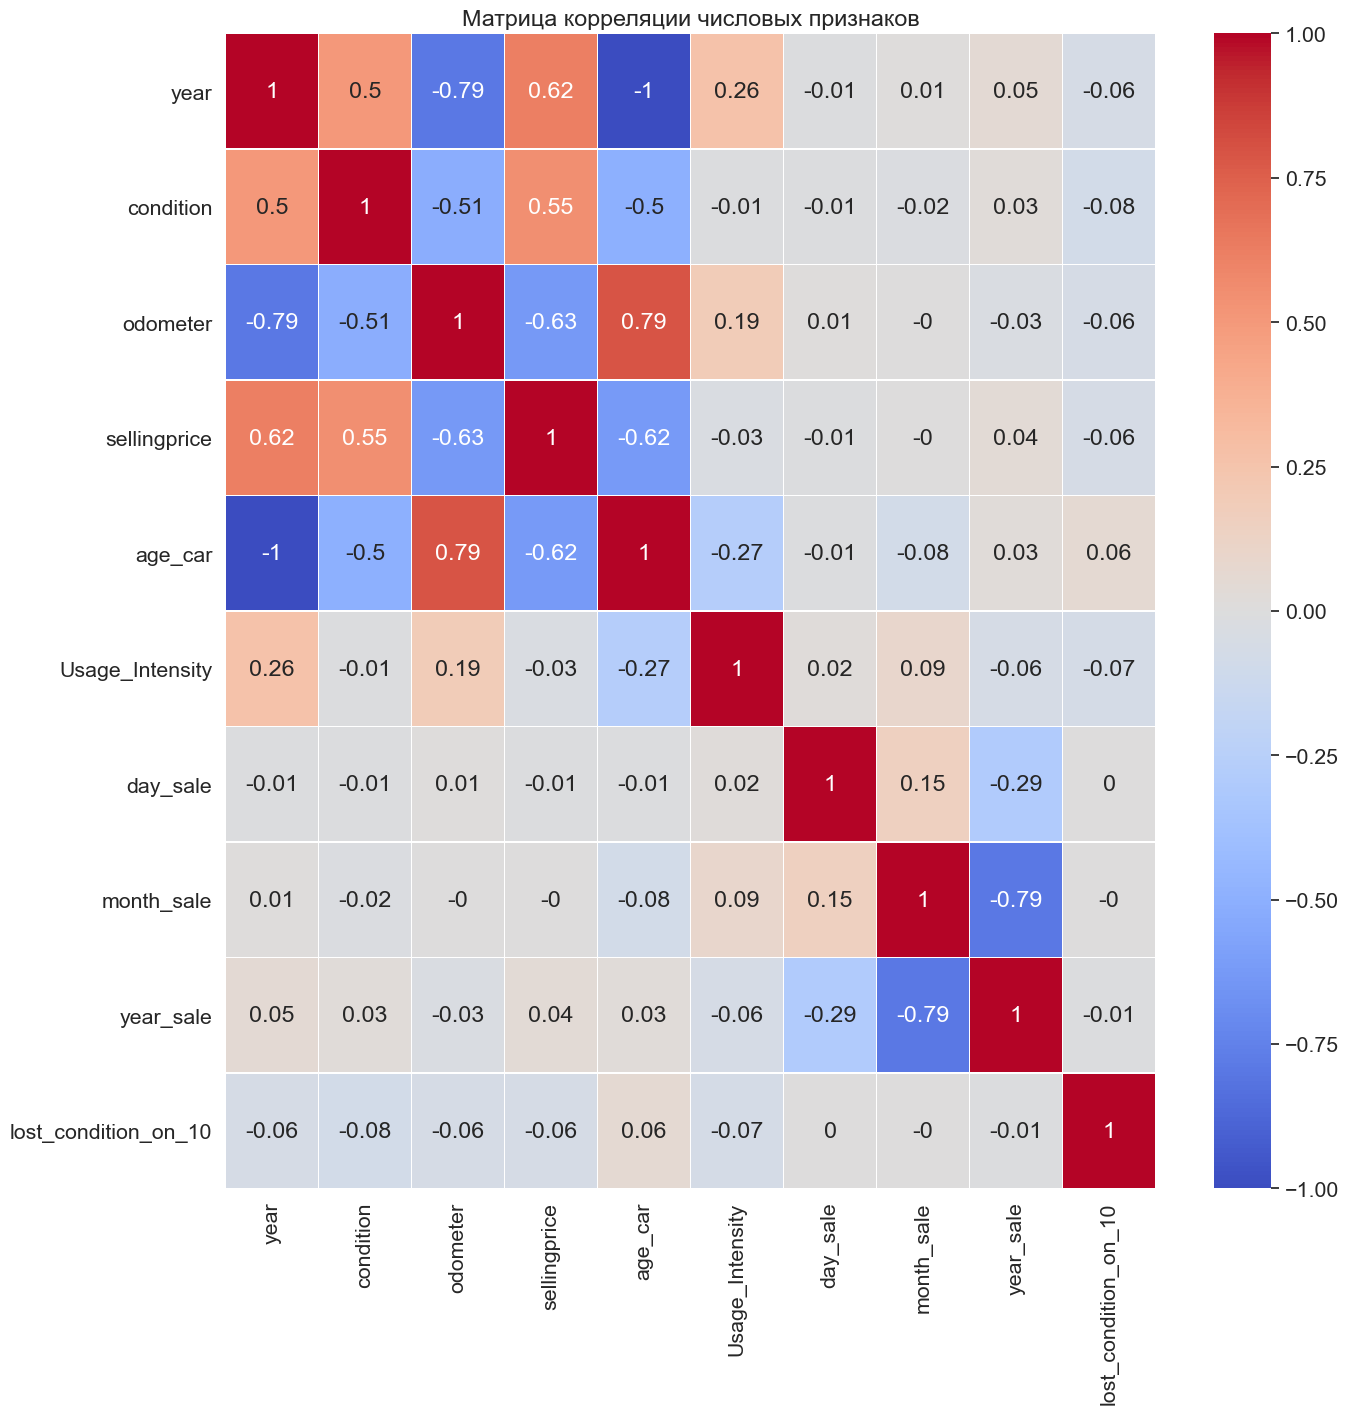

In [ ]:
matrix_cor(train_db)

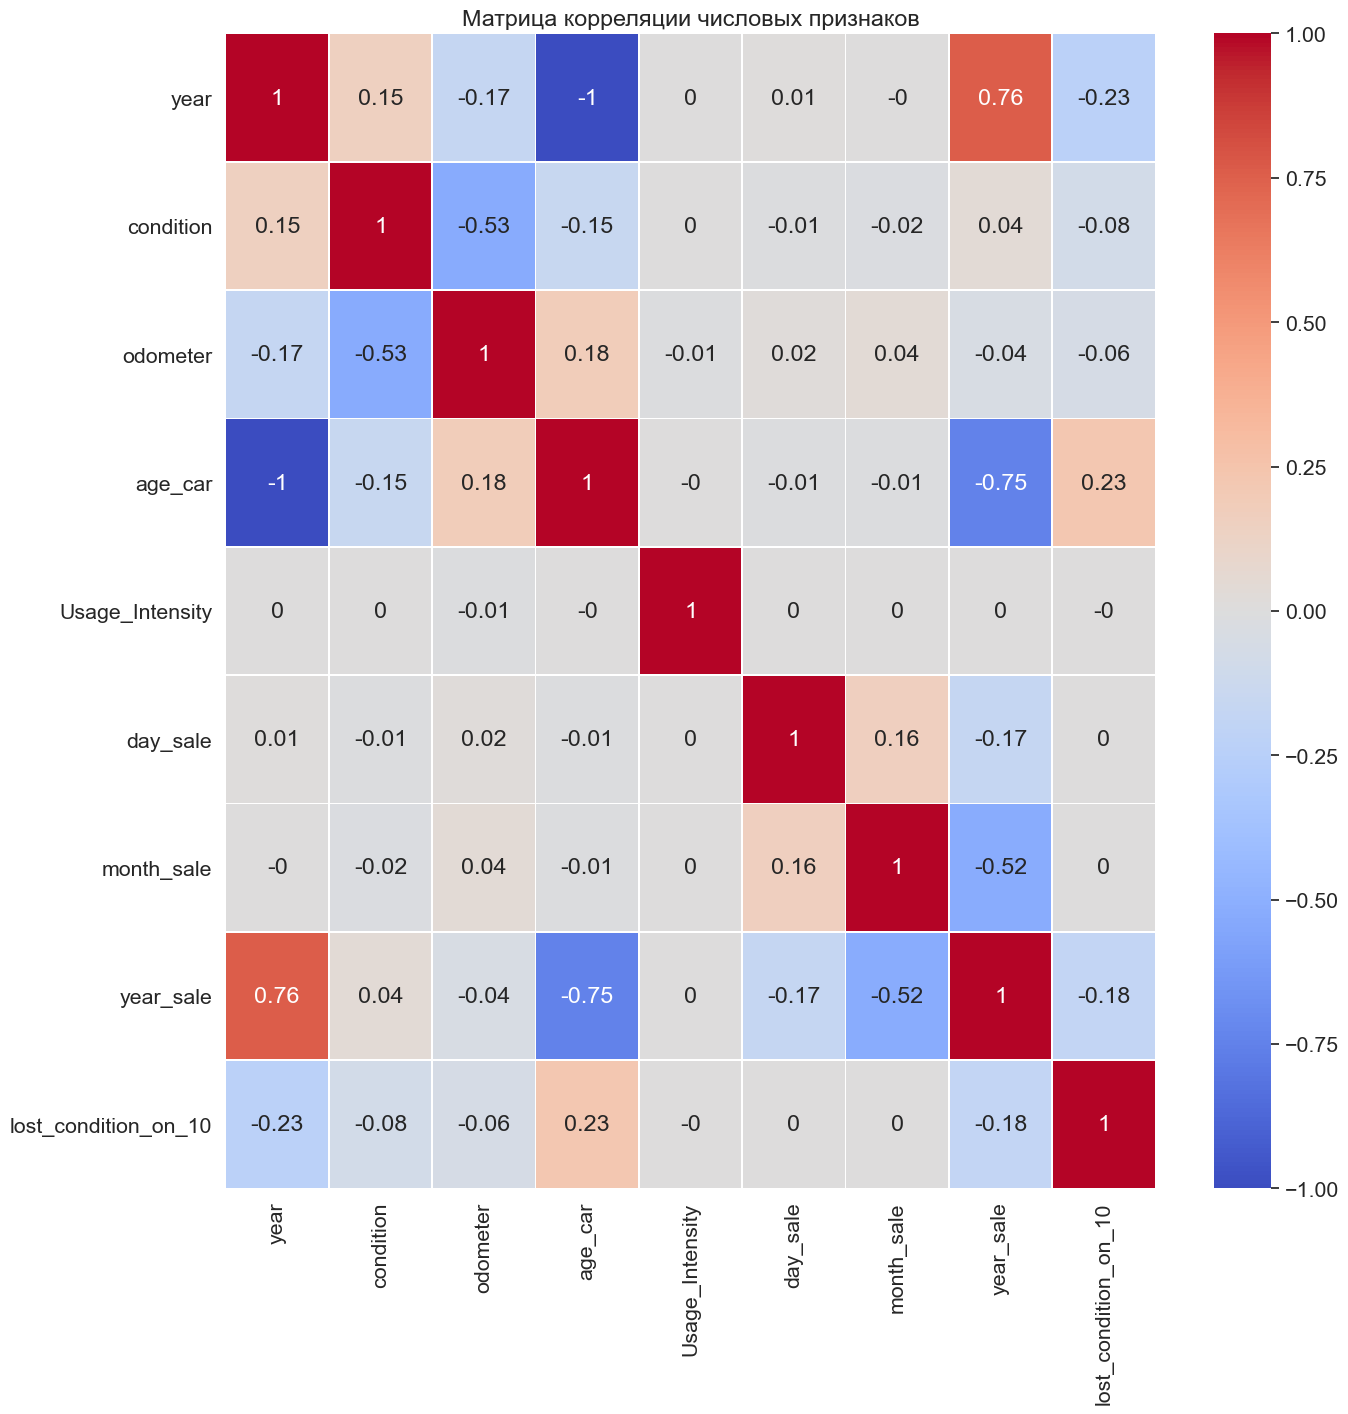

In [ ]:
matrix_cor(test_db)

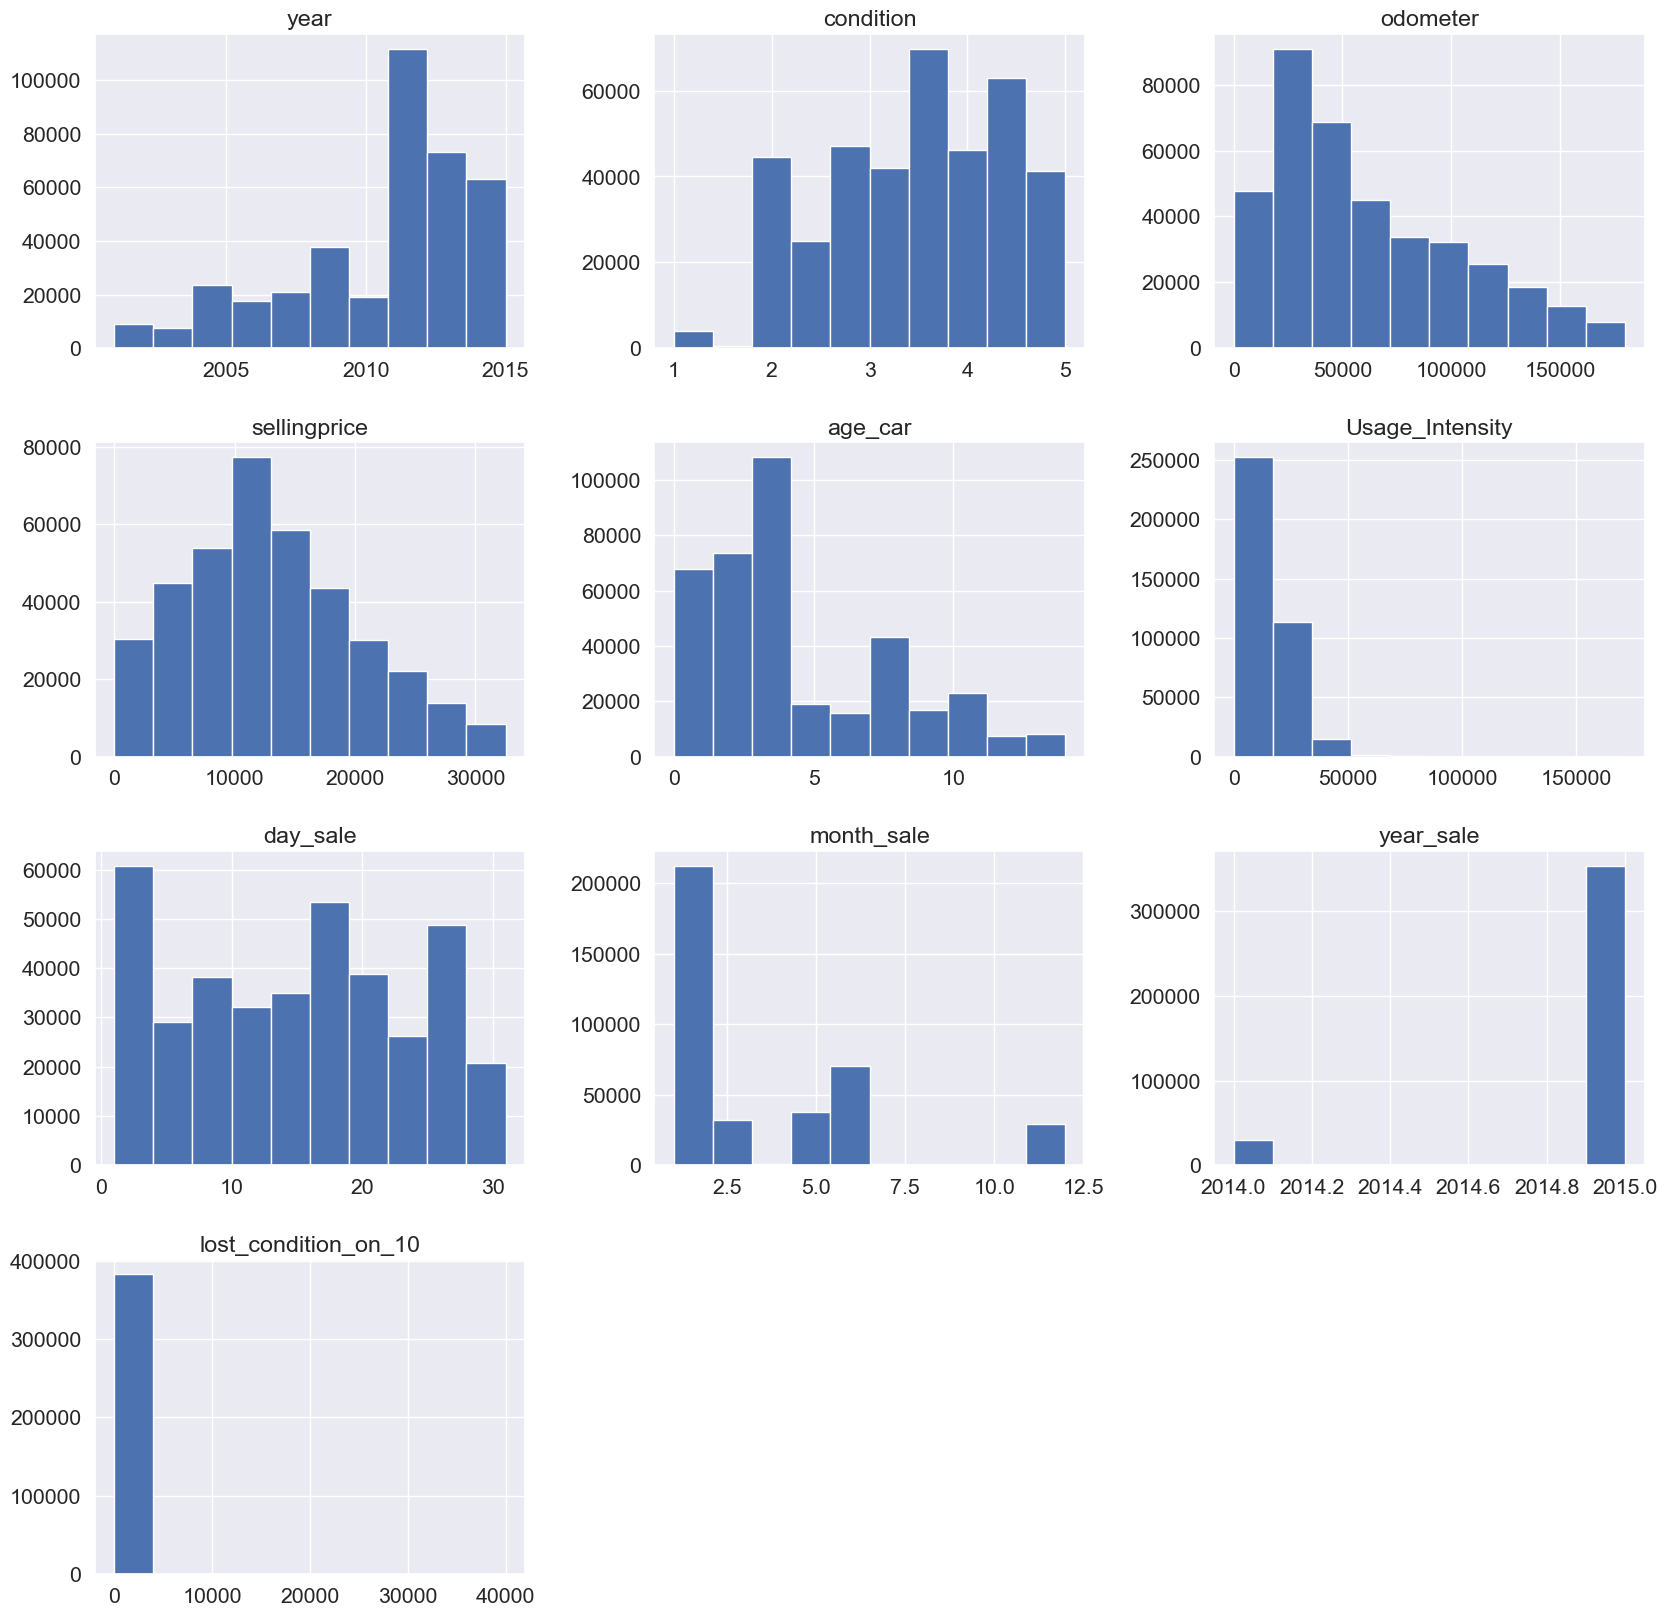

In [ ]:
train_db.hist(figsize=(20, 20))
plt.show()

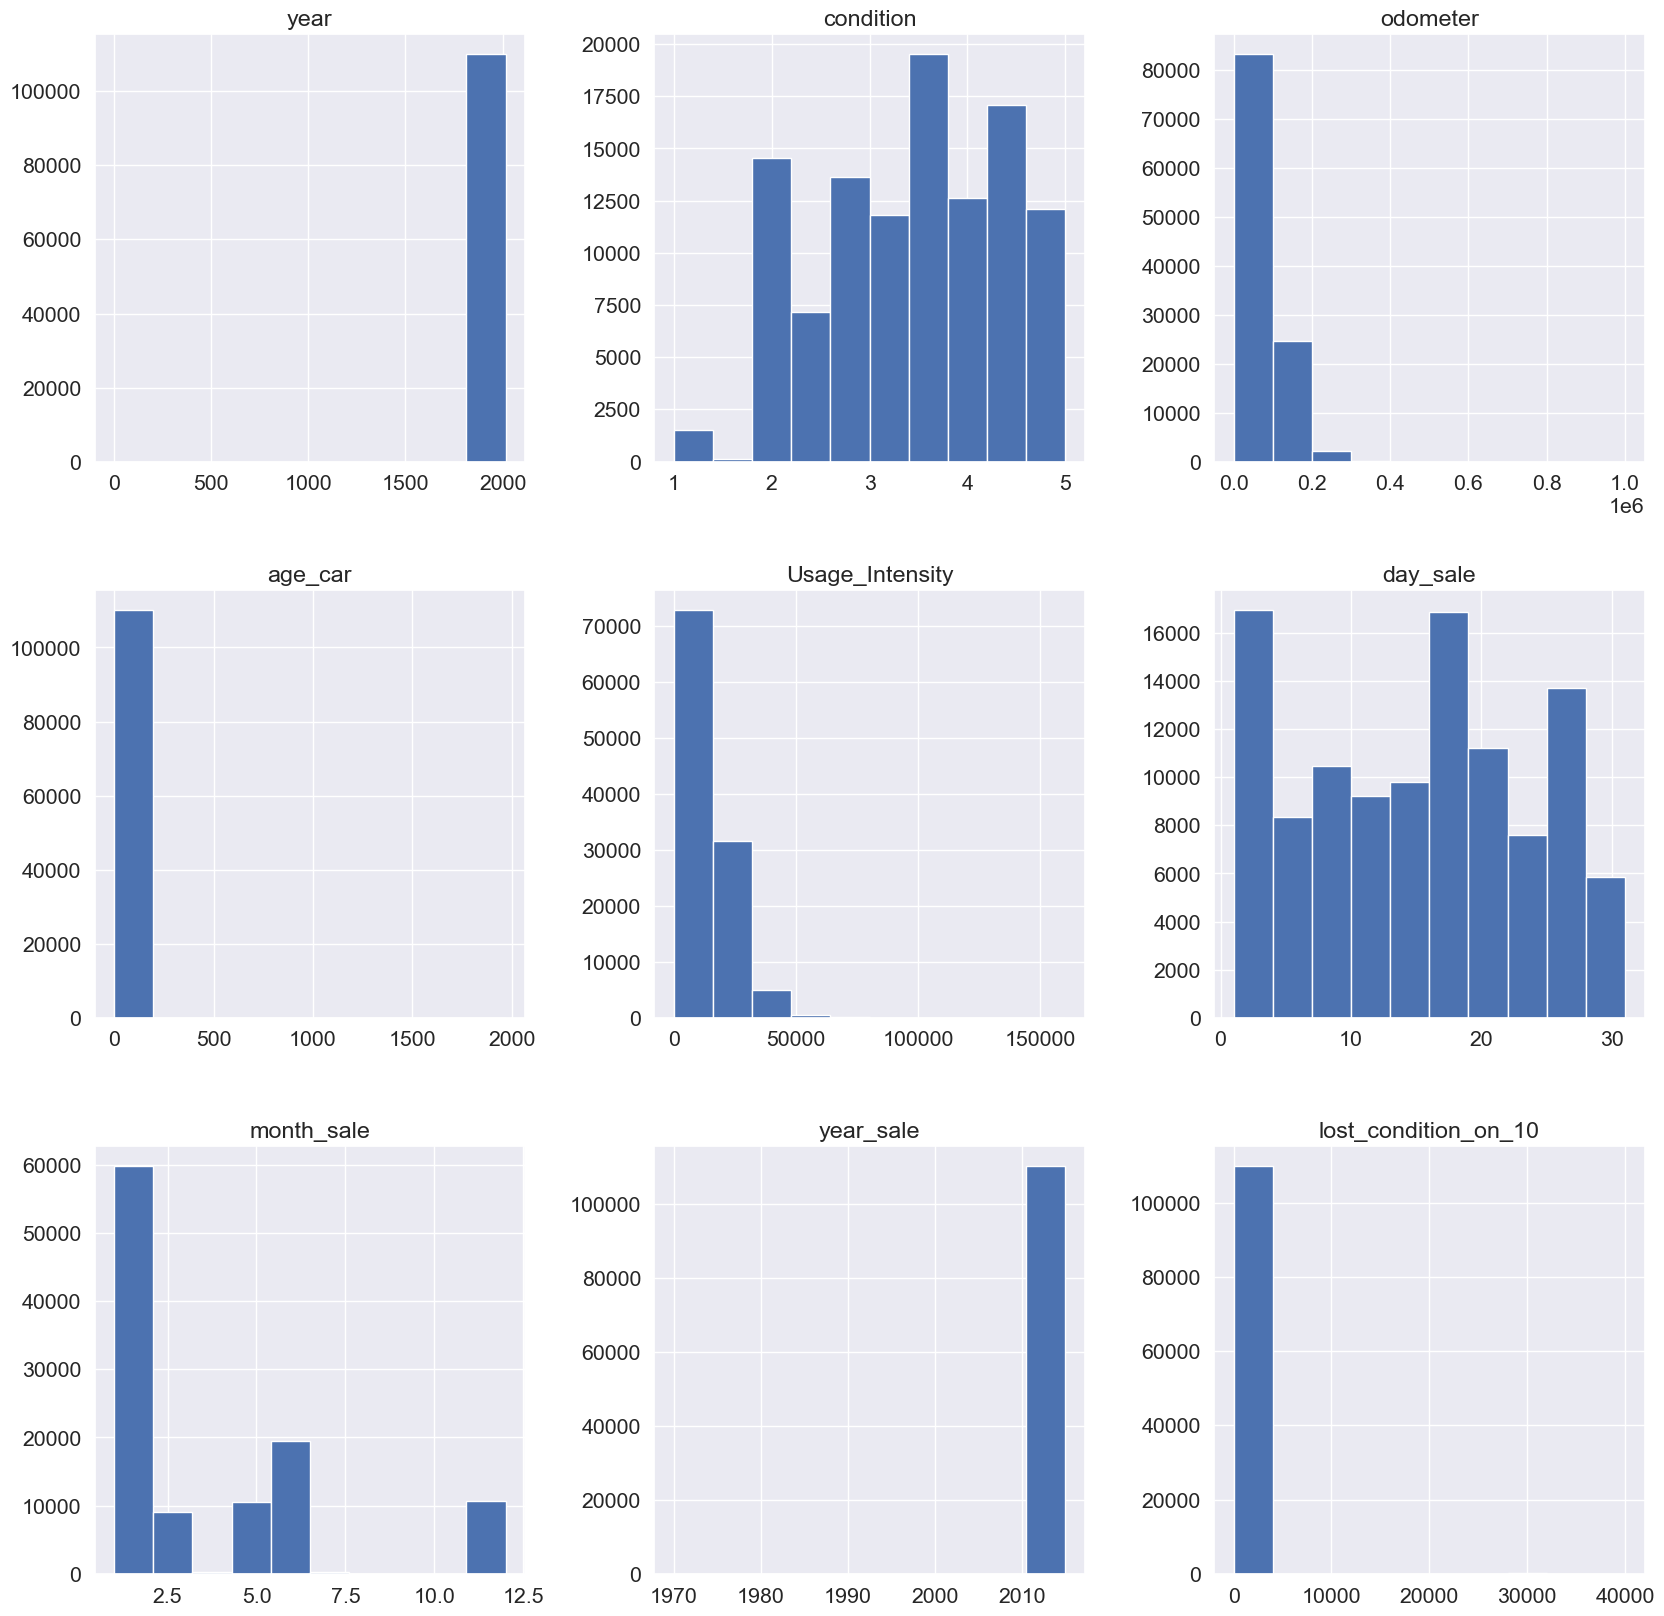

In [ ]:
test_db.hist(figsize=(20, 20))
plt.show()

In [ ]:
# применим данную функцию к датасетам
columns_int_tr, columns_object_tr = int_or_object(train_db)
columns_int_test, columns_object_test = int_or_object(test_db)


In [ ]:
test_db.plot.scatter
plt.show()

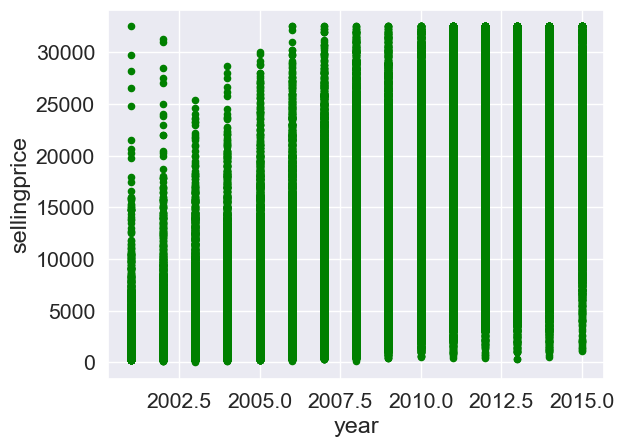

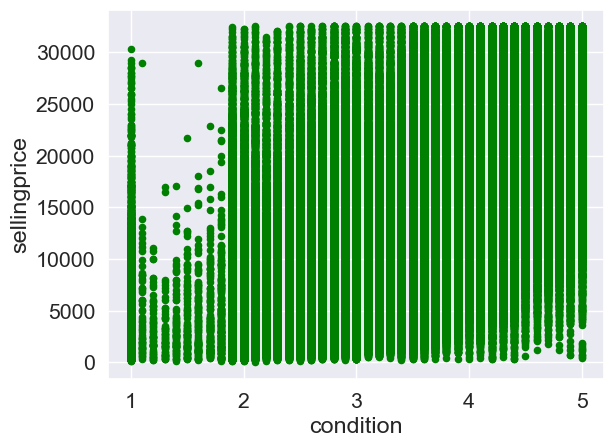

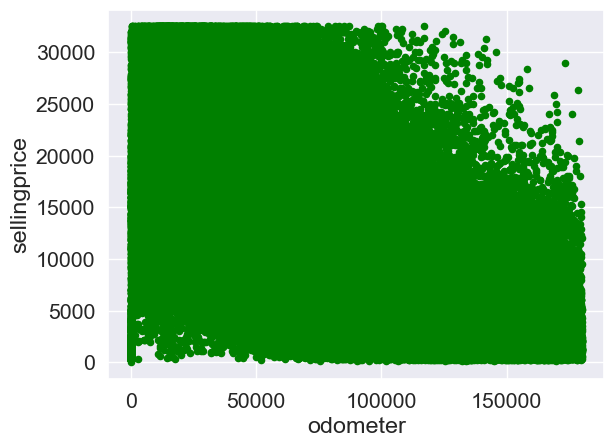

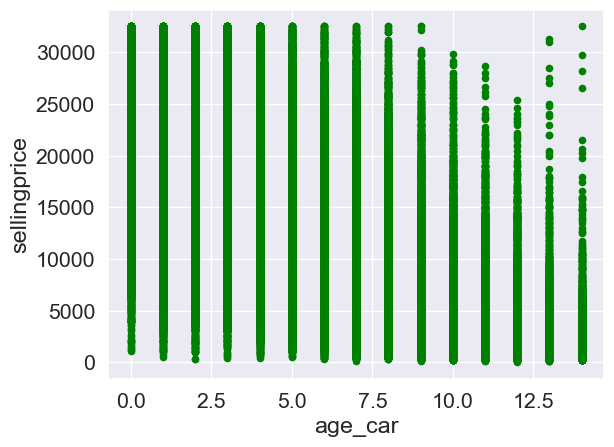

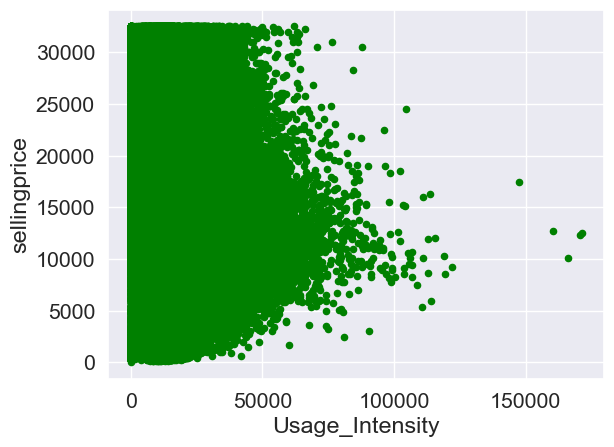

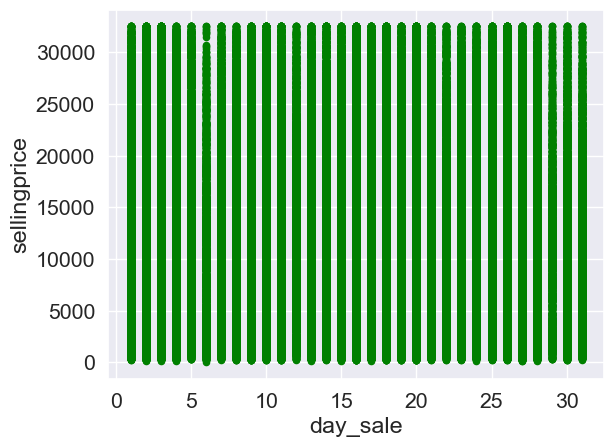

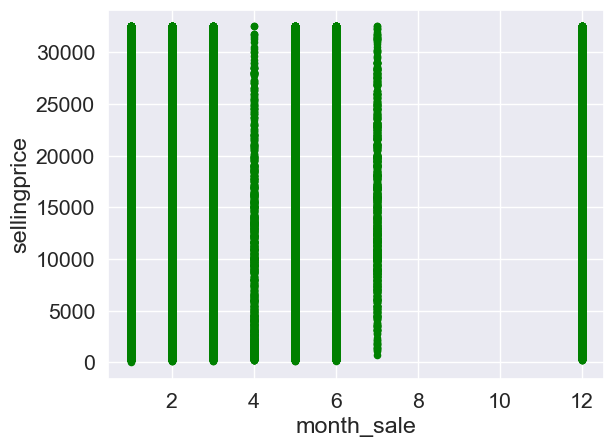

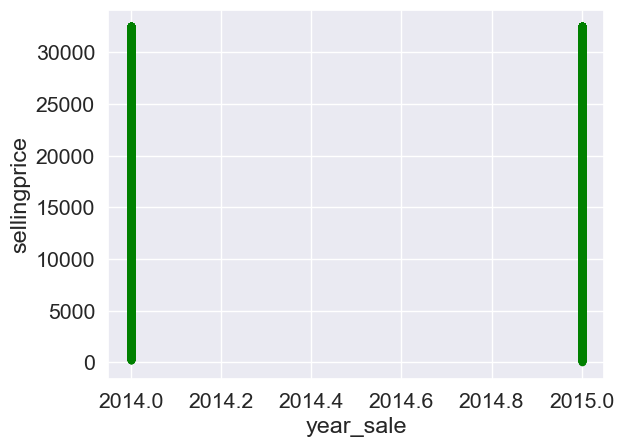

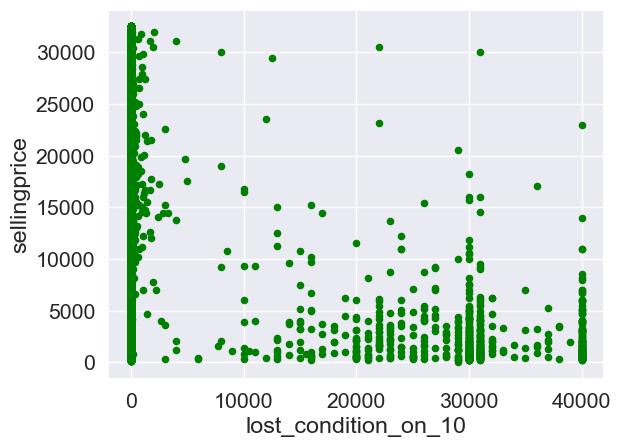

In [ ]:
for i in columns_int_test:
    train_db.plot.scatter(y = 'sellingprice', x = i, c = 'Green')
    plt.show()

По графику точечного распределения значений было выявлено что колонка 'lost_condition_on_10' имееет слишкои большой разрброс и не равномерное распределение, удалим её

In [ ]:
# удалим явно коррелирующие друг с другом позиции
train_db = train_db.drop(['year_sale', 'lost_condition_on_10'], axis = 1)
test_db = test_db.drop(['year_sale', 'lost_condition_on_10'], axis = 1)

**Вывод:** В ходе исследования данных были добавлены новые столбцы. Было проведено исследование на корреляцию признаков и их точечвено распределение по значениям относительно цены. В ходе исследования было выявлены вбросовые и сильно коррелирующие данные, котоыре были удалены из датасета.

# 4. Подготовка датасетов к ML

In [ ]:
# сохраним отдельно значения vin из тестового датасета
main_target_vin = pd.DataFrame()
main_target_vin = test_db['vin']
main_target_vin.shape

(110058,)

In [ ]:
def split_data_to_ml(data, to_drop, target):
    '''функция делит датасеты на параметры и таргет'''
    features = data.drop(to_drop, axis = 1)
    target = data[target]

    return features, target


In [ ]:
# деление датасета на признаки и таргет
features, target = split_data_to_ml(
    train_db, ['sellingprice', 'vin', 'trim', 'state', 'interior', 'seller'], 'sellingprice')

In [ ]:
# удаляем аналогичные данные из датасета test
test_db = test_db.drop(['vin', 'trim', 'state', 'interior', 'seller'], axis = 1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383188 entries, 0 to 440235
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             383188 non-null  int64  
 1   make             383188 non-null  object 
 2   model            383188 non-null  object 
 3   body             383188 non-null  object 
 4   transmission     383188 non-null  object 
 5   condition        383188 non-null  float64
 6   odometer         383188 non-null  float64
 7   color            383188 non-null  object 
 8   age_car          383188 non-null  int64  
 9   Usage_Intensity  383188 non-null  float64
 10  Origin           383188 non-null  object 
 11  day_sale         383188 non-null  int64  
 12  month_sale       383188 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 49.0+ MB


In [ ]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             110058 non-null  int64  
 1   make             110058 non-null  object 
 2   model            110058 non-null  object 
 3   body             110058 non-null  object 
 4   transmission     110058 non-null  object 
 5   condition        110058 non-null  float64
 6   odometer         110058 non-null  float64
 7   color            110058 non-null  object 
 8   age_car          110058 non-null  int64  
 9   Usage_Intensity  110058 non-null  float64
 10  Origin           110058 non-null  object 
 11  day_sale         110058 non-null  int64  
 12  month_sale       110058 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [ ]:
# деление датасета train на тренировочную и вилдационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(
   features, target, test_size=0.30, random_state = 12345, shuffle = True)

In [ ]:
#категориальные признаки
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
ohe_features

['make', 'model', 'body', 'transmission', 'color', 'Origin']

In [ ]:
#численные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['year',
 'condition',
 'odometer',
 'age_car',
 'Usage_Intensity',
 'day_sale',
 'month_sale']

In [ ]:
%%time
# кодирование данных техникой OHE
encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False )

# обучаем энкодер
encoder_ohe.fit(features_train[ohe_features])

# добавляем закодированные признаки датасет

features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

# удаляем незакодированные категориальные признаки
features_train = features_train.drop(ohe_features, axis=1)

#скелер
scaler = StandardScaler()

# обучаем его
features_train[num_features] = scaler.fit_transform(features_train[num_features])

features_train.head()
features_train.shape

CPU times: total: 1min 27s
Wall time: 1min 27s


(268231, 748)

In [ ]:
%%time
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую

features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

# скелером масштабируем тестовую
features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)

# смотрим на результат
features_valid.head()
features_valid.shape

CPU times: total: 38.3 s
Wall time: 38.4 s


(114957, 748)

In [ ]:
%%time

test_db[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(test_db[ohe_features])

# удаляем незакодированные категориальные признаки
test_db = test_db.drop(ohe_features, axis=1)

# трансформируем данные
test_db[num_features] = scaler.transform(test_db[num_features])

test_db.head()
test_db.shape

CPU times: total: 36 s
Wall time: 36.1 s


(110058, 748)

**Вывод:** Были перекодированны данные в датасетах. Итоговое количество колонок после кодировки категориальных переменных составляет 748

# 5. Исследование моделей обучения

In [ ]:
# функция для сохранения результатов пердсказания
def save_db(data, name):
    path = str(name) + '.csv'
    filepath = Path(path)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    data.to_csv(filepath, index=False)

In [ ]:
%%time
#Модель случайный лес

model_RF = RandomForestRegressor(random_state = 12345)
model_RF.fit(features_train, target_train) # обучите модель на тренировочной выборке
predictions_RF = model_RF.predict(features_valid) # получите предсказания модели на валидационной выборке

result_RF = mean_absolute_percentage_error(target_valid, predictions_RF) # посчитайте значение метрики MAPE
print("MAPE модели на валидационной выборке:", result_RF)

MAPE модели на валидационной выборке: 0.156473671796594
CPU times: total: 22min 9s
Wall time: 22min 17s


In [ ]:
%%time
# модель Ridge

model_Re = Ridge(random_state = 12345)
model_Re.fit(features_train, target_train)
predictions_Re = model_Re.predict(features_valid)

result_Re = mean_absolute_percentage_error(target_valid, predictions_Re)
print("MAPE модели на валидационной выборке:", result_Re)


MAPE модели на валидационной выборке: 0.30506468989304736
CPU times: total: 6.22 s
Wall time: 3.14 s


In [ ]:
%%time
# Градиентный бустинг

model_GB = GradientBoostingRegressor(random_state = 12345)
model_GB.fit(features_train, target_train)
predictions_GB = model_GB.predict(features_valid)

result_GB = mean_absolute_percentage_error(target_valid, predictions_GB)
print("MAPE модели на валидационной выборке:", result_GB)

MAPE модели на валидационной выборке: 0.3006933892775018
CPU times: total: 5min 34s
Wall time: 5min 35s


In [ ]:
%%time
# Модель ElasticNet

model_EN = ElasticNet(random_state = 12345)
model_EN.fit(features_train, target_train)
predictions_EN = model_GB.predict(features_valid)

result_EN = mean_absolute_percentage_error(target_valid, predictions_EN)
print("MAPE модели на валидационной выборке:", result_EN)


MAPE модели на валидационной выборке: 0.3006933892775018
CPU times: total: 10.7 s
Wall time: 5.63 s


In [ ]:
categorical_features_indices = np.where([features_train.dtypes == np.object])[
      0
 ]

In [ ]:
%%time
# Catboost регрессия
model_CB = CatBoostRegressor(
        eval_metric='MAPE',
        iterations=20000,
        learning_rate=0.1,
        metric_period=50,
        random_state=42,
        verbose=500,
        early_stopping_rounds=100,
        task_type="GPU"
    )
model_CB.fit(features_train, target_train,  cat_features = categorical_features_indices)
CB_preds = model_CB.predict(features_valid)

# calculate mean squared error on val sub-set preds
result_CB = mean_absolute_percentage_error(target_valid, CB_preds)
print("MAPE модели на валидационной выборке:", result_CB)


0:	learn: 1.0732922	total: 22.1ms	remaining: 7m 22s
500:	learn: 0.1994686	total: 3.42s	remaining: 2m 13s
1000:	learn: 0.1776022	total: 6.88s	remaining: 2m 10s
1500:	learn: 0.1698291	total: 10.3s	remaining: 2m 6s
2000:	learn: 0.1642248	total: 13.7s	remaining: 2m 2s
2500:	learn: 0.1604049	total: 17.1s	remaining: 1m 59s
3000:	learn: 0.1578333	total: 20.5s	remaining: 1m 55s
3500:	learn: 0.1562919	total: 24s	remaining: 1m 53s
4000:	learn: 0.1538208	total: 27.4s	remaining: 1m 49s
4500:	learn: 0.1527725	total: 30.8s	remaining: 1m 46s
5000:	learn: 0.1514590	total: 34.2s	remaining: 1m 42s
5500:	learn: 0.1495902	total: 37.7s	remaining: 1m 39s
6000:	learn: 0.1484378	total: 41s	remaining: 1m 35s
6500:	learn: 0.1472905	total: 44.4s	remaining: 1m 32s
7000:	learn: 0.1458257	total: 47.7s	remaining: 1m 28s
7500:	learn: 0.1440041	total: 51.1s	remaining: 1m 25s
8000:	learn: 0.1427480	total: 54.5s	remaining: 1m 21s
8500:	learn: 0.1419645	total: 57.8s	remaining: 1m 18s
9000:	learn: 0.1403381	total: 1m 1s	r

In [ ]:
# Предсказание результатов на тестовой выборке и
# сохранение результатов
predict = model_CB.predict(test_db)
df = pd.DataFrame(data = {'vin': main_target_vin, 'sellingprice': predict}, index = range(len(main_target_vin)))
save_db(df, 'sample_submission')

# 6. Заключение

<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">

>В ходе работы были выполнены следующие операции:
>>- Изучена общая информация о представленном датасете
>>- Изучены данные в предоставленных датасетах
>>- Подготовка датасета для обучения моделей МО
>>- Исследованы результаты разных моделей МО
>>- Выбрана лучшая модель МО


> В ходе исследования была выявлена самая лучшая модель для решения задачи- CatBoostRegressor. Параметры MAPE данной модели составляет 0.14 на валидационной выборке. Классические модели линейной регрессии без перебора гиперпараметров погазывают удволетворительные результаты. Вероятнее всего, это связано с большим количеством шумовых данных категориальных переменных.
